# neuron layer creation convenience functions

In [1]:
from spikeflow import IzhikevichNeuronLayer, uniform_sampler, normal_sampler
import spikeflow.drawing_utils.neuron_layer_drawing as nld

/Applications/Anaconda/anaconda/envs/mlbook/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Create neuron layer from tuples: specify each neuron explicitly

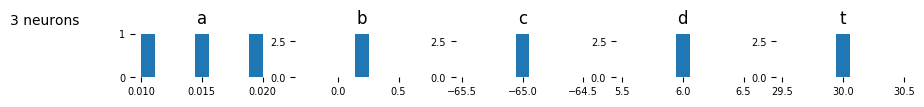

In [2]:
nl0 = IzhikevichNeuronLayer.layer_from_tuples([
    IzhikevichNeuronLayer.C(a=0.010, b=0.2, c=-65.0, d=6.0, t=30.0, v0=0.0),
    IzhikevichNeuronLayer.C(a=0.015, b=0.2, c=-65.0, d=6.0, t=30.0, v0=0.0),
    IzhikevichNeuronLayer.C(a=0.020, b=0.2, c=-65.0, d=6.0, t=30.0, v0=0.0)
])

nld.draw_izhikevich_neuron_layer_abcdt_distributions(nl0)

# Create neuron layer with identical neurons

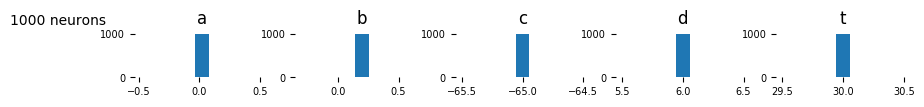

In [3]:
nl1 = IzhikevichNeuronLayer.layer_with_n_identical_neurons(1000, 0.02, 0.2, -65.0, 6.0, 30.0, 0.0, 0.5)

nld.draw_izhikevich_neuron_layer_abcdt_distributions(nl1)

# Create neuron layer with neurons with configuration values uniformly distributed over some ranges

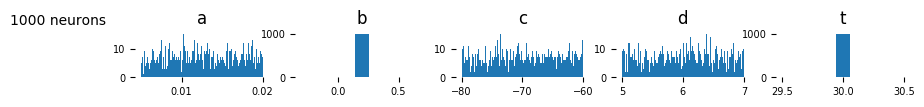

In [4]:
nl2 = IzhikevichNeuronLayer.layer_with_n_distributions(1000, 
    uniform_sampler(0.005, 0.02),
    uniform_sampler(0.2, 0.2),
    uniform_sampler(-80.0, -60),
    uniform_sampler(5.0, 7.0),
    uniform_sampler(30.0, 30.0),
    uniform_sampler(0.0, 0.0), 
    0.5)

nld.draw_izhikevich_neuron_layer_abcdt_distributions(nl2)

# Create neuron layer with neurons with configuration values normally distributed over some ranges

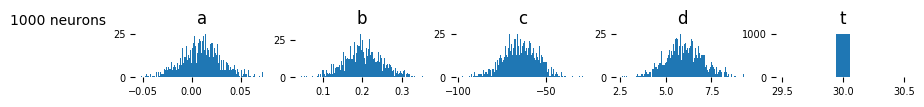

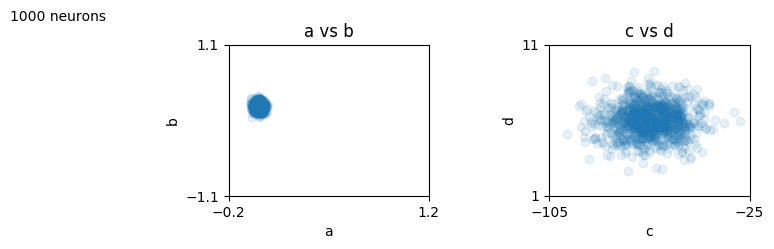

In [5]:
nl3 = IzhikevichNeuronLayer.layer_with_n_distributions(1000, 
    normal_sampler(0.01, 0.02),
    normal_sampler(0.2, 0.05),
    normal_sampler(-65.0, 10),
    normal_sampler(6.0, 1.0),
    normal_sampler(30.0, 0.0),
    normal_sampler(0.0, 0.0), 
    0.5)

nld.draw_izhikevich_neuron_layer_abcdt_distributions(nl3)
nld.draw_izhikevich_neuron_layer_ab_cd_distributions(nl3, cd_ranges=((-105, -25), (1, 11)))

# We can get the configuration values as a pandas dataframe

In [6]:
df = nl3.to_dataframe()
df.head()

,a,b,c,d,t,v0
0,0.009817,0.211403,-65.698143,4.957254,30.0,0.0
1,0.015773,0.216004,-63.527233,6.265868,30.0,0.0
2,0.011960,0.165367,-64.727486,5.994678,30.0,0.0
3,0.046350,0.192139,-51.640167,6.615163,30.0,0.0
4,0.015544,0.242954,-55.414665,5.311539,30.0,0.0


# The actual constructor for the layer takes a 2-d numpy array

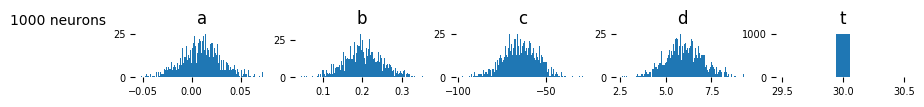

In [7]:
nl4 = IzhikevichNeuronLayer(df.values)

nld.draw_izhikevich_neuron_layer_abcdt_distributions(nl4)